Cryptography

Tagging along with Polylog and Claude

References:

[I can prove I’ve solved this Sudoku without revealing it - Polylog](https://youtu.be/Otvcbw6k4eo?si=0PMUnGsDrkqXEeVc)

Tutor:

Anthropic's AI Claude

Zero knowledge proofs were first introduced in the 1980s by Shafi Goldwasser, Silvio Micali, and Charles Rackoff, and have become increasingly important in modern cryptography, particularly for applications like blockchain technology, secure authentication systems, and privacy-preserving protocols.

This script:

1. Creates a graph with 6 nodes and 7 edges using NetworkX
2. Implements a function to verify that no two adjacent edges share the same color
3. Implements a function to find a valid edge coloring
4. Visualizes the graph with the proper edge coloring
5. Prints the solution

When you run this script, it will display a graph where adjacent edges (edges that share a node) have different colors. This is an example of an edge coloring problem, which relates to the mathematical concept of edge chromatic number in graph theory.

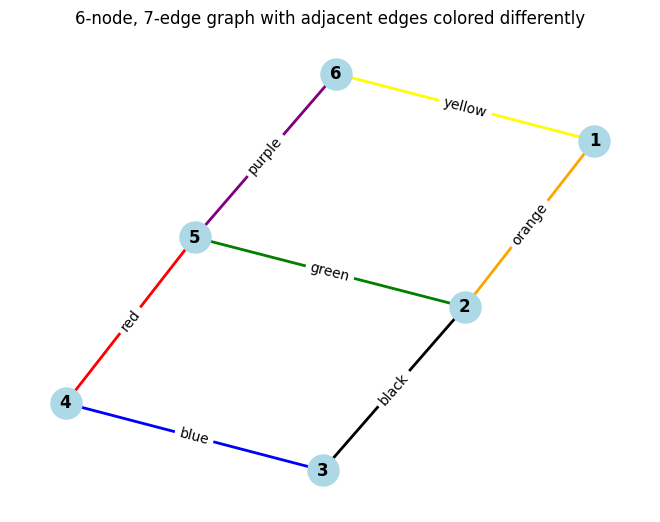

Edge coloring solution:
Edge (1, 2): orange
Edge (1, 6): yellow
Edge (2, 3): black
Edge (2, 5): green
Edge (3, 4): blue
Edge (4, 5): red
Edge (5, 6): purple


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a graph with 6 nodes and 7 edges
G = nx.Graph()

# Add nodes
G.add_nodes_from(range(1, 7))

# Add 7 edges
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1), (2, 5)]
G.add_edges_from(edges)

# Function to check if a coloring is valid
def is_valid_coloring(G, edge_colors):
    for node in G.nodes():
        # Get all edges connected to this node
        incident_edges = list(G.edges(node))

        # Get colors of these edges
        incident_colors = [edge_colors[e] for e in incident_edges]

        # Check if any duplicate colors
        if len(incident_colors) != len(set(incident_colors)):
            return False

    return True

# Function to color edges
def color_edges(G):
    edges = list(G.edges())
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'black']

    # Initialize with random coloring
    edge_colors = {}

    # Try different colorings until a valid one is found
    max_attempts = 1000
    attempt = 0

    while attempt < max_attempts:
        # Assign random colors
        random.shuffle(colors)
        edge_colors = {edge: colors[i % len(colors)] for i, edge in enumerate(edges)}

        # Also store the reverse edges (NetworkX treats (1,2) and (2,1) as the same edge)
        for edge in edges:
            edge_colors[(edge[1], edge[0])] = edge_colors[edge]

        if is_valid_coloring(G, edge_colors):
            break

        attempt += 1

    return edge_colors

# Color the edges
edge_colors = color_edges(G)

# Extract colors in the order of edges for drawing
color_list = [edge_colors[edge] for edge in G.edges()]

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # For reproducible layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=2, edge_color=color_list)

# Add a legend
edge_labels = {edge: edge_colors[edge] for edge in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('6-node, 7-edge graph with adjacent edges colored differently')
plt.show()

# Print the coloring solution
print("Edge coloring solution:")
for edge in G.edges():
    print(f"Edge {edge}: {edge_colors[edge]}")

This script:

1. Creates a graph with 6 nodes and 7 edges using NetworkX
2. Implements a function to verify that no two adjacent nodes share the same color
3. Implements the Welsh-Powell algorithm for node coloring
4. Visualizes the graph with the proper node coloring
5. Prints the coloring solution

When you run this script, it will display a graph where adjacent nodes (nodes connected by an edge) have different colors. This is an example of a vertex coloring problem, which relates to the mathematical concept of chromatic number in graph theory.

The Welsh-Powell algorithm used here is a greedy coloring algorithm that:
1. Sorts nodes by degree (number of connections) in descending order
2. Assigns the first available color to each node that doesn't conflict with its neighbors

This approach often finds near-optimal colorings, though it doesn't guarantee a minimum number of colors.

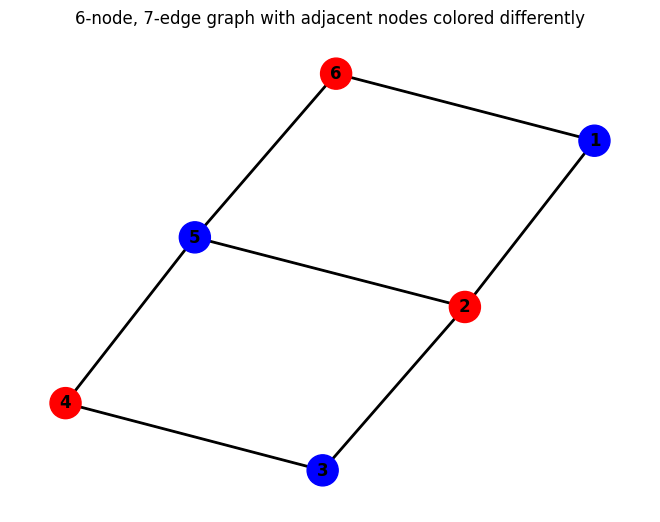

Node coloring solution:
Node 1: blue
Node 2: red
Node 3: blue
Node 4: red
Node 5: blue
Node 6: red


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Create a graph with 6 nodes and 7 edges
G = nx.Graph()

# Add nodes
G.add_nodes_from(range(1, 7))

# Add 7 edges
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1), (2, 5)]
G.add_edges_from(edges)

# Function to check if a node coloring is valid
def is_valid_node_coloring(G, node_colors):
    for edge in G.edges():
        node1, node2 = edge
        # If adjacent nodes have the same color, the coloring is invalid
        if node_colors[node1] == node_colors[node2]:
            return False
    return True

# Function to color nodes
def color_nodes(G):
    nodes = list(G.nodes())
    # Using Welsh-Powell algorithm for node coloring

    # Sort nodes by degree (number of connections) in descending order
    nodes_by_degree = sorted(nodes, key=lambda node: G.degree(node), reverse=True)

    # Available colors
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow']

    # Initialize all nodes with no color
    node_colors = {node: None for node in nodes}

    # Color each node
    for node in nodes_by_degree:
        # Get colors of neighbors
        neighbor_colors = {node_colors[neighbor] for neighbor in G.neighbors(node) if node_colors[neighbor] is not None}

        # Find the first available color not used by any neighbor
        for color in colors:
            if color not in neighbor_colors:
                node_colors[node] = color
                break

    return node_colors

# Color the nodes
node_colors = color_nodes(G)

# Extract colors in the order of nodes for drawing
color_list = [node_colors[node] for node in G.nodes()]

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # For reproducible layout
nx.draw(G, pos, with_labels=True, node_color=color_list, node_size=500, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=2)

plt.title('6-node, 7-edge graph with adjacent nodes colored differently')
plt.show()

# Print the coloring solution
print("Node coloring solution:")
for node in G.nodes():
    print(f"Node {node}: {node_colors[node]}")